In [1]:
# import libraries
import numpy as np
import pandas as pd

# read in df
routes = pd.read_csv("Routes.csv", encoding = 'latin-1')
species = pd.read_csv("SpeciesList.csv")
wa_observes = pd.read_csv("Washing.csv")
weather = pd.read_csv("Weather.csv")

# filter to only WA (State num = 89)
wa_weather = weather[weather["StateNum"] == 89]

# filter to ranier (route 61) and bay view (route 66)
mt_ranier_weather = wa_weather[wa_weather["Route"] == 61].drop(["CountryNum", "StateNum", "Route"], axis = 1)
bay_view_weather = wa_weather[wa_weather["Route"] == 66]

In [2]:
# filter to only WA routes 
wa_routes = routes[routes["StateNum"] == 89]

# filter to ranier (route 61) and bay view (route 66)
mt_ranier = wa_observes[wa_observes["Route"] == 61] #mountain
bay_view = wa_observes[wa_observes["Route"] == 66] #waterfront

#  joins routes, species, and preliminary weather data (mt rainer)
mt_ranier_species_obs = pd.merge(mt_ranier, species, on = ["AOU", "AOU"])
mt_ranier_species_obs = pd.merge(mt_ranier_species_obs, mt_ranier_weather, on = ["RouteDataID", "RouteDataID"])
mt_ranier_species_obs = mt_ranier_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]

# calculate avg temp (mt rainer)
mt_ranier_species_obs["AvgTemp"] = (mt_ranier_species_obs["EndTemp"] + mt_ranier_species_obs["StartTemp"])/2
mt_ranier_species_obs = mt_ranier_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)

# pick Sooty Goose species
print(mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Sooty Grouse"] )

# join routes, species, and preliminary weather data (bay view)
bay_view_species_obs = pd.merge(bay_view, species, on = ["AOU", "AOU"])
bay_view_species_obs = pd.merge(bay_view_species_obs, bay_view_weather, on = ["RouteDataID", "RouteDataID"])
bay_view_species_obs = bay_view_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]

# calculate avg temp (bay view)
bay_view_species_obs["AvgTemp"] = (bay_view_species_obs["EndTemp"] + bay_view_species_obs["StartTemp"])/2
bay_view_species_obs = bay_view_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)

# pick wilsons warbler
print(mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Wilson's Warbler"] )

     Year_x English_Common_Name  SpeciesTotal  Month  Day  AvgTemp
32     1991        Sooty Grouse             6      6   27     49.5
109    1993        Sooty Grouse             5      6   24     47.5
146    1994        Sooty Grouse             6      6   13     48.5
228    1998        Sooty Grouse             1      6   19     51.0
260    1999        Sooty Grouse             4      6   27     53.5
299    2000        Sooty Grouse             2      6   17     60.0
338    2001        Sooty Grouse             4      6   18     53.0
400    2003        Sooty Grouse             5      6   15     54.0
467    2006        Sooty Grouse            11      6   14     62.5
497    2007        Sooty Grouse             2      6   21     65.0
538    2008        Sooty Grouse             6      6   19     42.5
572    2009        Sooty Grouse             2      6   19     50.5
605    2010        Sooty Grouse             4      6   23     49.5
636    2011        Sooty Grouse             4      6   21     

Mt Ranier AOU

Sooty Grouse (Watch - Decline), 2971

3930 4050 4130 4200 4240 4330 4590 4660 4780 4840 4860 4880 4980 5290
 5330 5540 5600 5671 5880 6130 6150 6190 6560 6650 6850 7221 7280 7480
 7580 7590 7610 7630 2971 4641 5140 6140 6270 6460 6680 6690 6800 7410
 7490 2630 4220 4930 5210 5850 6070 6320 6810 7170 2120 4680 4910 7010
 7260 7540 3690 4010 4690 5170 5810 7380 3720 5830 6520 6685 3120 3680
 4030 5150 4950 6450 3790 5960 4360

 Bay View

 Wilson's Warbler (Steep Decline)

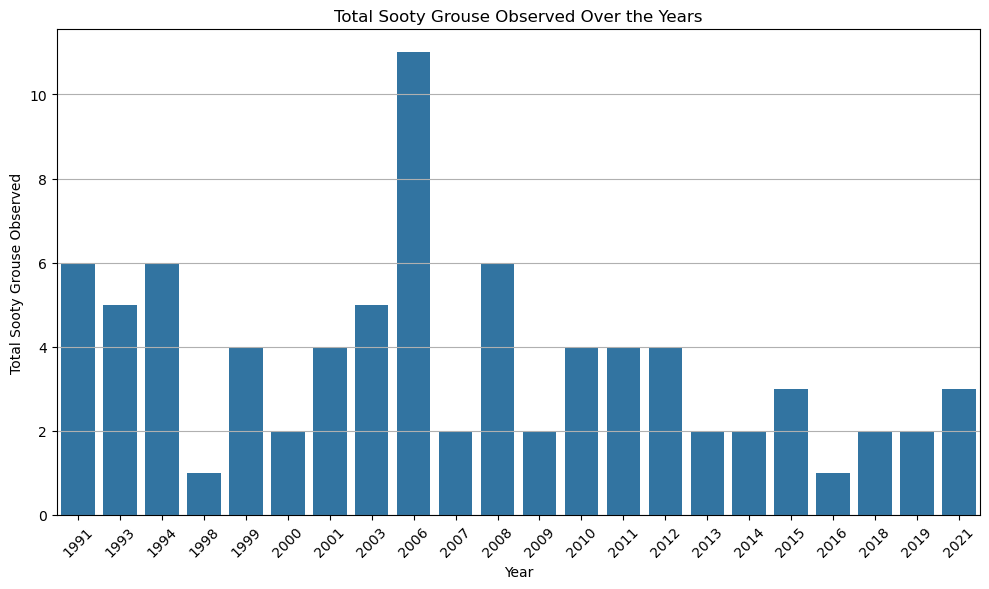

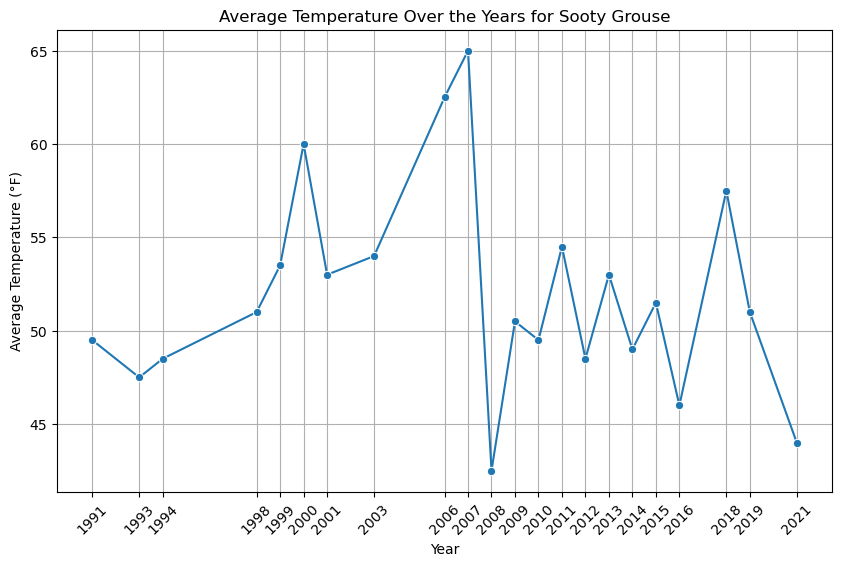

In [4]:
# df for sooty grouse
Sooty_Grouse = mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Sooty Grouse"]

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for SpeciesTotal over the years
plt.figure(figsize=(10, 6))
sns.barplot(data=Sooty_Grouse, x='Year_x', y='SpeciesTotal')
plt.title('Total Sooty Grouse Observed Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sooty Grouse Observed')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a line plot for AvgTemp over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=Sooty_Grouse, x='Year_x', y='AvgTemp', marker='o')
plt.title('Average Temperature Over the Years for Sooty Grouse')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.xticks(Sooty_Grouse['Year_x'])
plt.tick_params(axis = 'x', rotation =45)
plt.grid()
plt.show()

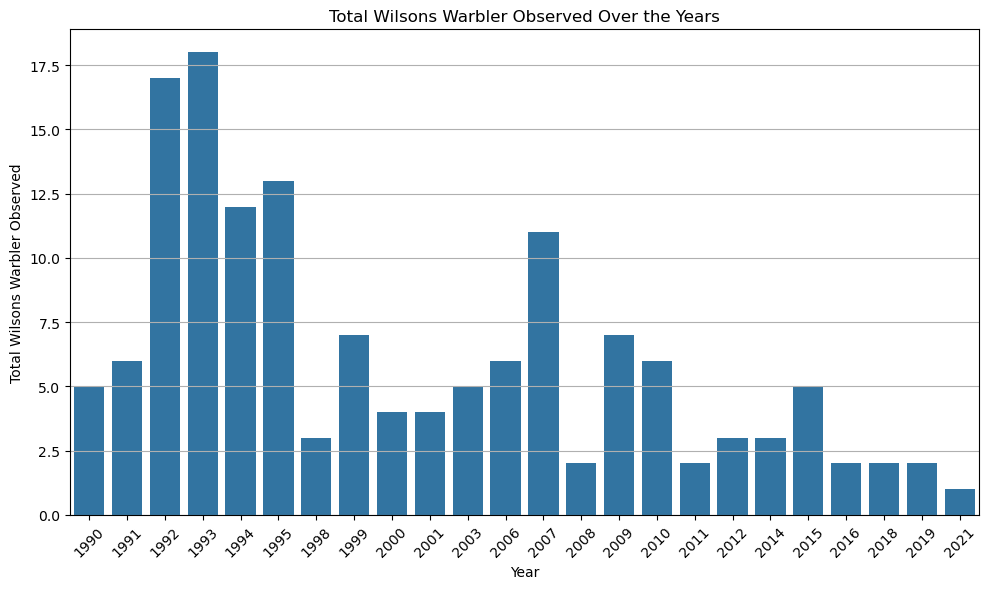

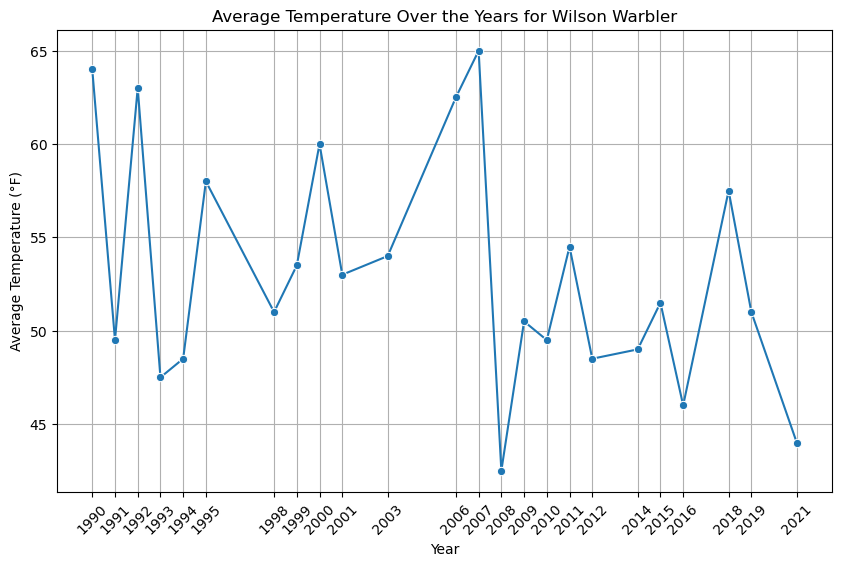

In [5]:
# df for sooty grouse
Wilsons_Warbler = mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Wilson's Warbler"]

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for SpeciesTotal over the years
plt.figure(figsize=(10, 6))
sns.barplot(data=Wilsons_Warbler, x='Year_x', y='SpeciesTotal')
plt.title('Total Wilsons Warbler Observed Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Wilsons Warbler Observed')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a line plot for AvgTemp over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=Wilsons_Warbler, x='Year_x', y='AvgTemp', marker='o')
plt.title('Average Temperature Over the Years for Wilson Warbler')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.xticks(Wilsons_Warbler['Year_x'])
plt.tick_params(axis = 'x', rotation =45)
plt.grid()
plt.show()